    Atividade 1 - Barbara Gaspar Chan Tong 11201721332

In [1]:
import numpy as np
import imageio
import cv2 as openCV
import matplotlib.pyplot as plt

In [2]:
PIG_IMG = imageio.imread('./PIG_MR')
METADATA = PIG_IMG.meta

In [3]:
pxl = METADATA.Columns
pxlData = [px for px in range(512)]

PLT_NAME_id = METADATA.PatientID

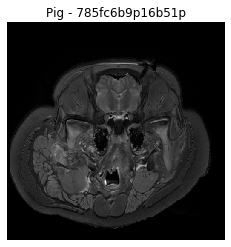

In [4]:
plt.imshow(PIG_IMG, cmap = 'gray')
plt.title('Pig - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [5]:
pixelValues, grayLevels = np.histogram(PIG_IMG.ravel(), range(pxl))

# print(np.shape(pixelValues)) retorna um vetor

maxIntensidade = np.max(pixelValues)
minIntensidade = np.min(pixelValues)

print('max intensidade: %.0f' % maxIntensidade)
print('min intensidade: %.0f' % minIntensidade)

max intensidade: 58268
min intensidade: 0


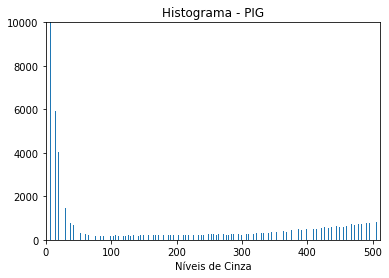

In [6]:
plt.bar(grayLevels[:-1], pixelValues, width=1, edgecolor='none')
plt.title('Histograma - PIG')
plt.xlabel('Níveis de Cinza')
plt.xlim([-0.5, pxl])
plt.ylim([0, 10000])
plt.show()

In [8]:
# parametros de ajuste: rho vem da funcao que gera o histograma, omega e sigma sao ajustados
def sigmoid(data, omega, sigma):
    pxl = len(data)
    sig = np.zeros(pxl)
    for i in range(pxl-1):
        facSigmoid = 1 + np.exp(- ((data[i] - omega)/sigma) )
        sig[i] = (pxl-1) * (1/facSigmoid)
    return sig

In [11]:
sigResult = sigmoid(pxlData, 30, -150)

In [13]:
plt.plot(sigResult, pxlData)
plt.title('Sigmoid')